# Regression Model for Real Estate Price Prediction


# 1) Data Importing and Pre-processing

## 1.1) Importing Libraries

Importing the necessary libraries to read the dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2) Importing Dataset

Importing the dataset from the csv file and storing it in a dataframe

In [2]:
# Import the complete redfin dataset
df = pd.io.parsers.read_csv("./redfin_2022-10-09-15-54-14-new-to-check-H0-regression.csv", dtype={'ZIP OR POSTAL CODE': 'str'})

## 1.3) Initial Data Summary

Review data field attributes and data types

In [3]:
# View a snapshot of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    350 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                350 non-null    object 
 3   ADDRESS                                                                                      348 non-null    object 
 4   CITY                                                                                         350 non-null    object 
 5   STATE OR PROVINCE                   

In [4]:
# Display the first 5 rows of the dataset
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1970 Columbia St #304,San Diego,CA,92101,499000,1.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/CA/San-Diego/1970-Colum...,SDMLS,220025457,N,Y,32.725060,-117.168156
1,MLS Listing,NaN,Condo/Co-op,1912 Diamond St #3,San Diego,CA,92109,949900,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/San-Diego/1912-Diamo...,SDMLS,220025394,N,Y,32.804197,-117.235911
2,MLS Listing,NaN,Single Family Residential,5193 Winthrop St,San Diego,CA,92117,1050000,3.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/CA/San-Diego/5193-Winth...,SDMLS,220025348,N,Y,32.839374,-117.178517
3,MLS Listing,NaN,Single Family Residential,1732 Gamma St,National City,CA,91950,599000,3.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/CA/National-City/1732-G...,SDMLS,220025279,N,Y,32.689770,-117.091337
4,MLS Listing,NaN,Single Family Residential,4646 Del Mar Ave,San Diego,CA,92107,3499000,4.0,3.5,...,Pre On-Market,NaN,NaN,https://www.redfin.com/CA/San-Diego/4646-Del-M...,SDMLS,220025197,N,Y,32.738250,-117.249171


Checking for missing values

In [5]:
# Brief Data Snapshot before cleaning data to check for missing values
print("Missing Values Present:", df.isnull().values.any())
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())

Missing Values Present: True
Sum of missing values:  1246
Columns with NA:  ['SOLD DATE', 'ADDRESS', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME']


## 1.4) Data Cleaning

Cleaning the data by removing unnecessary columns and replacing missing values

In [6]:
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_mod = df.drop(['SALE TYPE', 'CITY', 'STATUS', 'STATE OR PROVINCE', 'SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Fill NA values of "DAYS ON MARKET" with 0
df_mod["DAYS ON MARKET"].fillna(0, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_mod[df_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].mean(), inplace=True)
# df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].median(), inplace=True) # Use median instead of mean to avoid outliers

# Fill NA "Year Built" with Mean Value
df_mod["YEAR BUILT"].fillna(df_mod['YEAR BUILT'].mean(), inplace=True)
# df_mod["YEAR BUILT"].fillna(df_mod['YEAR BUILT'].median(), inplace=True) # Use median instead of mean to avoid outliers

# Fill NA "BEDS" with Mean Value 
df_mod["BEDS"].fillna(df_mod['BEDS'].mean(), inplace=True)

# Fill NA "BATHS" with Mean Value
df_mod["BATHS"].fillna(df_mod['BATHS'].mean(), inplace=True)

# # Remove outlier largest $/SQUARE FEET
# outlier = df_mod[df_mod['$/SQUARE FEET'].max() == df_mod['$/SQUARE FEET']].index
# df_mod.drop(outlier, inplace = True)

# # Remove outlier largest "SQUARE FEET" value
# outlier = df_mod[df_mod['$/SQUARE FEET'].max() == df_mod['$/SQUARE FEET']].index
# df_mod.drop(outlier, inplace = True)

In [7]:
# Check for missing values after cleaning data
print("Missing Values Present:", df_mod.isnull().values.any())
print("Sum of missing values: ", df_mod.isnull().sum().sum())
print("Columns with NA: ", df_mod.columns[df_mod.isna().any()].tolist())


Missing Values Present: False
Sum of missing values:  0
Columns with NA:  []


# 2) Statistical Analysis and Visualization

## 2.1) Final Dataframe Information

In [8]:
# Display the info and datatypes for the new dataframe
df_mod.info()
df_mod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 349
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTY TYPE       347 non-null    object 
 1   ZIP OR POSTAL CODE  347 non-null    object 
 2   PRICE               347 non-null    int64  
 3   BEDS                347 non-null    float64
 4   BATHS               347 non-null    float64
 5   LOCATION            347 non-null    object 
 6   SQUARE FEET         347 non-null    float64
 7   LOT SIZE            347 non-null    float64
 8   YEAR BUILT          347 non-null    float64
 9   DAYS ON MARKET      347 non-null    int64  
 10  $/SQUARE FEET       347 non-null    float64
 11  HOA/MONTH           347 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 35.2+ KB


,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
0,Condo/Co-op,92101,499000,1.0,1.0,Downtown,631.0,20084.000000,2004.0,2,791.0,406.0
1,Condo/Co-op,92109,949900,2.0,2.5,Pacific Beach,1170.0,6750.000000,1994.0,2,812.0,289.0
2,Single Family Residential,92117,1050000,3.0,2.0,San Diego,1304.0,6400.000000,2010.0,3,805.0,0.0
3,Single Family Residential,91950,599000,3.0,1.0,National City,962.0,36983.059361,1952.0,3,623.0,0.0
4,Single Family Residential,92107,3499000,4.0,3.5,Ocean Beach,3761.0,7000.000000,1998.0,4,930.0,0.0


## 2.2) Dataframe Description

Descriptive statistics of the dataframe

In [9]:
df_mod.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
count,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,1.237244e+06,3.095376,2.353623,1672.948127,36983.059361,1978.561960,7.273775,732.345821,218.602305
std,9.600735e+05,1.389320,1.073671,949.805421,66022.499797,24.159359,13.983577,320.304518,323.586125
min,6.500000e+04,0.000000,1.000000,300.000000,800.000000,1914.000000,1.000000,217.000000,0.000000
25%,6.999500e+05,2.000000,2.000000,1098.500000,6200.000000,1960.000000,2.000000,560.500000,0.000000
50%,9.200000e+05,3.000000,2.000000,1444.000000,33213.000000,1980.000000,4.000000,659.000000,42.000000
75%,1.316000e+06,4.000000,2.500000,1872.000000,36983.059361,1998.000000,6.000000,807.500000,385.000000
max,6.400000e+06,14.000000,9.000000,6678.000000,687298.000000,2022.000000,108.000000,3501.000000,2897.000000


## 2.3) Dataframe Visualization (General)

Visualizing the dataframe using histograms

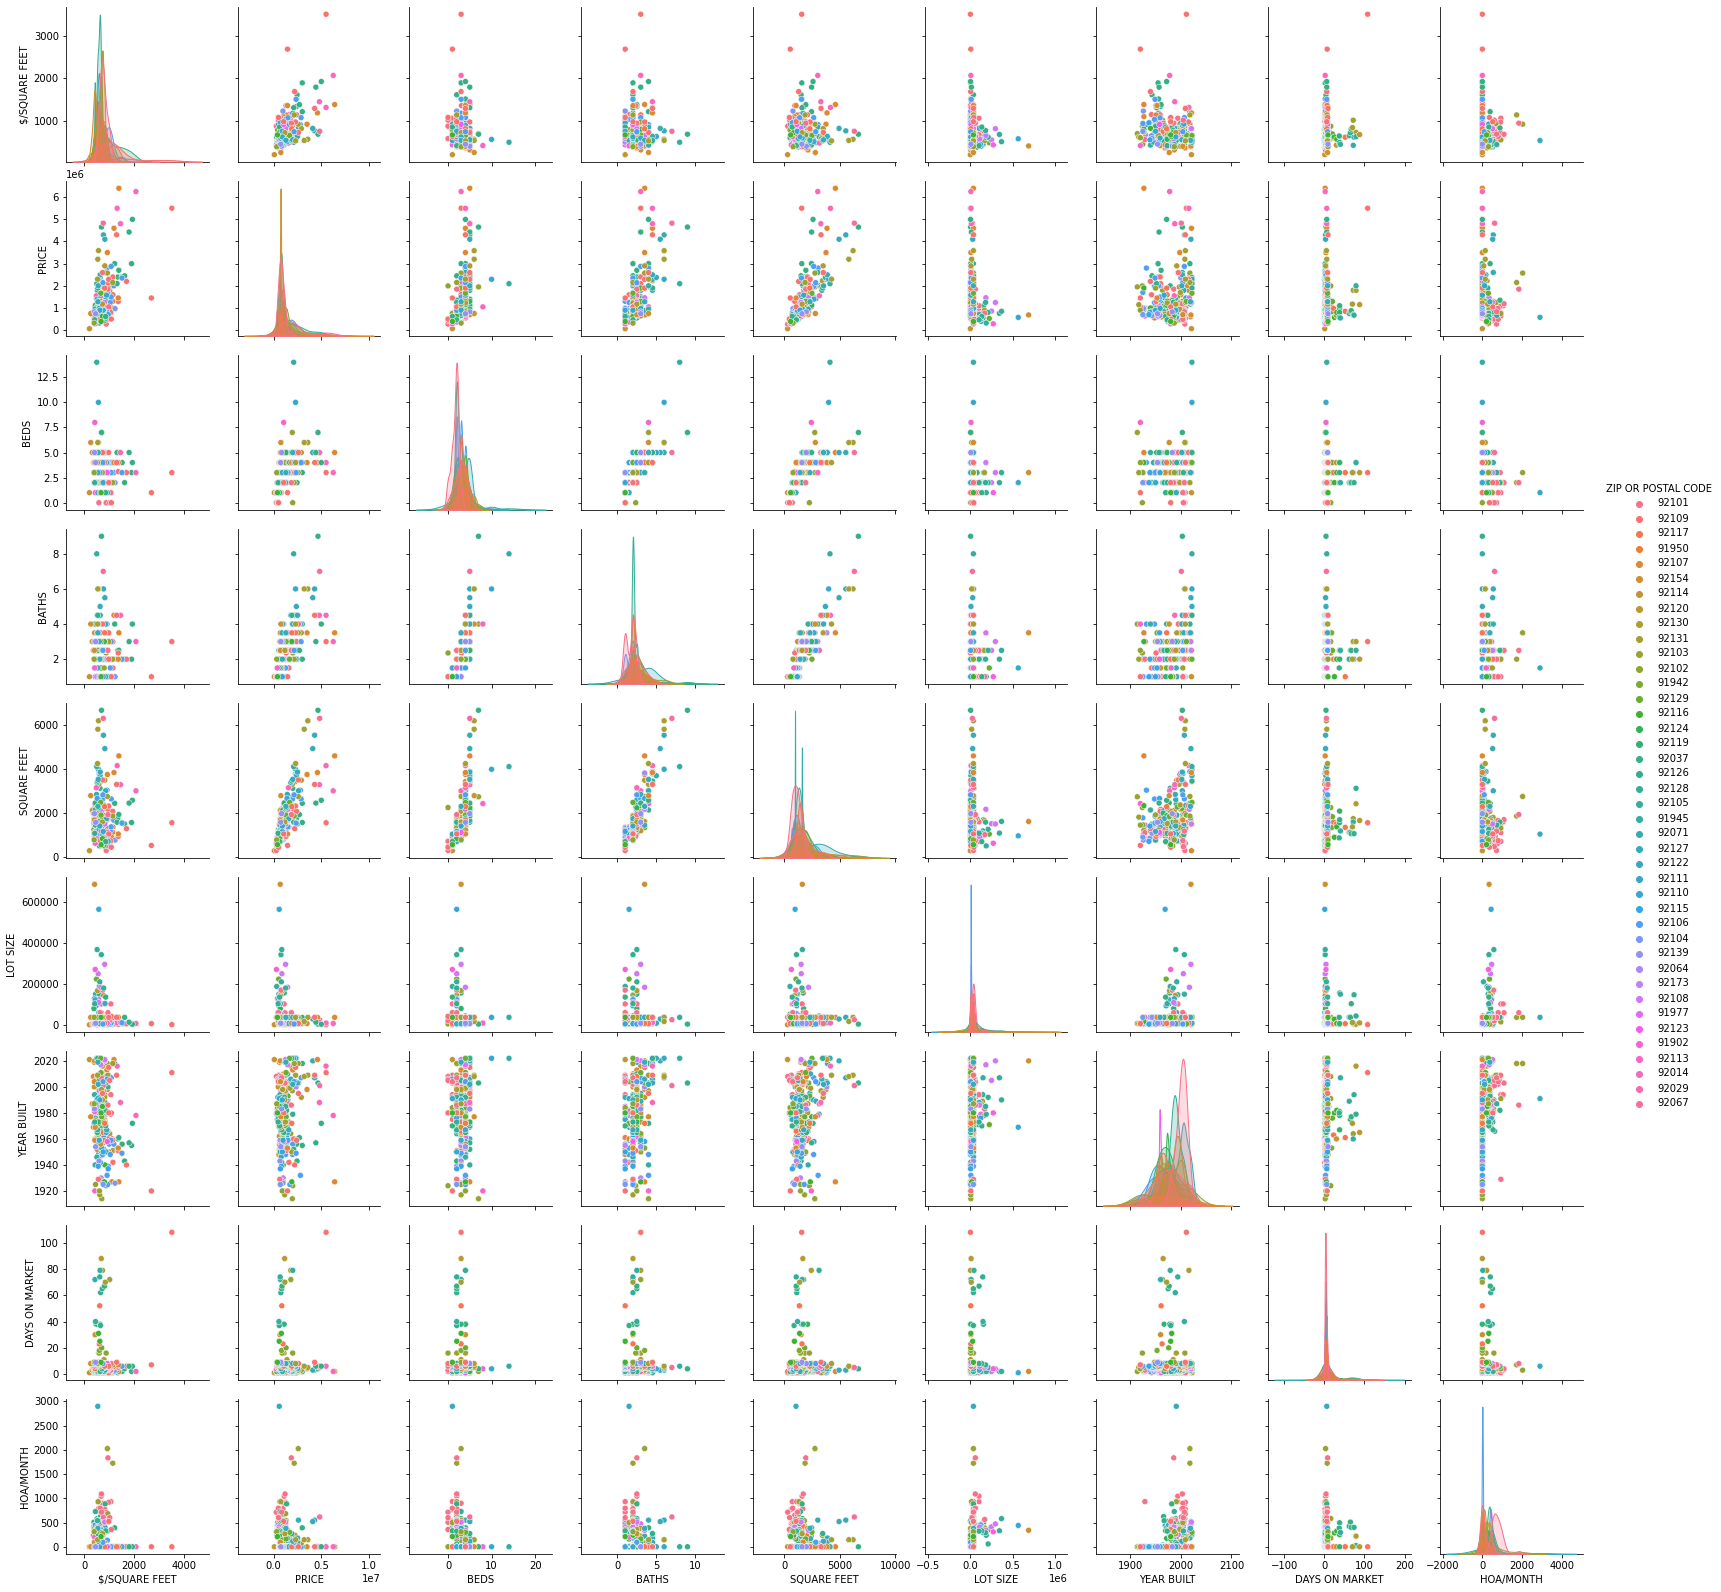

In [10]:
sns.pairplot(df_mod, vars=['$/SQUARE FEET',	'PRICE',	'BEDS',	'BATHS', 'SQUARE FEET',	'LOT SIZE',	'YEAR BUILT',	'DAYS ON MARKET',	'HOA/MONTH'], hue="ZIP OR POSTAL CODE")

## 2.4) Dataframe Insights

Grouping Dataframe by Neighborhood/Zipcode and calculating the mean of each column sorted by '$/SQUARE FEET'

In [11]:
# Group the dataframe by the "Zip or Postal Code" and display the mean of each group
df_group_mean = df_mod.groupby(["ZIP OR POSTAL CODE"]).mean().sort_values(by=['$/SQUARE FEET'], ascending=False)
df_group_mean

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
92014,5.515000e+06,4.000000,4.000000,3494.000000,9415.666667,1994.000000,4.666667,1615.000000,0.000000
92109,1.911494e+06,2.894188,2.380757,1588.000000,21135.637494,1974.166667,10.111111,1277.222222,114.000000
92107,2.891856e+06,3.428571,2.714286,2500.857143,18205.596869,1970.000000,3.857143,1149.142857,0.000000
92037,2.087160e+06,3.150000,2.750000,1838.700000,41311.123744,1974.800000,11.450000,1124.000000,276.250000
92106,1.878742e+06,3.416667,2.416667,1916.833333,6745.916667,1961.500000,3.833333,1008.083333,19.083333
92104,7.982856e+05,2.142857,1.214286,964.285714,21045.016960,1955.000000,3.571429,844.571429,99.714286
92103,1.429408e+06,2.666667,2.458333,1728.500000,22902.113014,1982.333333,10.500000,814.250000,621.583333
92122,1.162767e+06,3.000000,2.333333,1553.333333,29419.235413,1984.888889,4.222222,771.777778,439.111111
92101,8.111173e+05,1.615385,1.692308,1074.730769,47485.183527,1998.269231,3.346154,768.576923,752.538462


Grouping Dataframe by Neighborhood/Zipcode and calculating the standard deviation of each column

In [12]:
# Group the dataframe by the "Zip or Postal Code" and display the std of each group
df_group_std = df_mod.groupby(["ZIP OR POSTAL CODE"]).std()
df_group_std


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
91902,6.356890e+04,0.707107,0.000000,72.831998,165434.660552,0.000000,0.707107,41.719300,0.000000
91942,1.115809e+05,0.447214,0.547723,218.160491,13032.674413,4.847680,6.580274,50.126839,0.000000
91945,2.821427e+04,0.000000,0.353553,19.798990,19150.614929,24.041631,48.790368,12.020815,55.154329
91950,1.631816e+05,0.577350,0.629153,494.725850,15639.672488,25.316332,0.957427,111.775072,118.500000
91977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92014,7.252069e+05,1.000000,0.866025,595.928687,2560.592965,19.697716,2.309401,399.781190,0.000000
92029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92037,1.375570e+06,1.460894,1.618154,1243.785017,42350.780791,20.062009,20.273070,443.456282,279.007805
92064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Group the data by Neighborhood/Zipcode and describe the data for each zipcode

In [13]:
# Group data by ZIP Code and display descriptive statistics for each the "$/SQUARE FEET" column for each zip code
df_mod_zip = df_mod.groupby('ZIP OR POSTAL CODE').describe()
df_mod_zip["$/SQUARE FEET"].sort_values(by=['min'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
ZIP OR POSTAL CODE,,,,,,,,
92014,3.0,1615.000000,399.781190,1320.0,1387.50,1455.0,1762.50,2070.0
92107,7.0,1149.142857,187.604574,914.0,1019.00,1144.0,1279.50,1389.0
92067,1.0,765.000000,NaN,765.0,765.00,765.0,765.00,765.0
92106,12.0,1008.083333,205.519943,743.0,911.75,975.0,1080.75,1512.0
92109,18.0,1277.222222,715.976631,738.0,870.50,1073.5,1262.75,3501.0
92130,12.0,749.583333,54.039478,648.0,720.75,735.5,783.25,829.0
92037,20.0,1124.000000,443.456282,644.0,756.50,907.5,1420.00,1927.0
92104,7.0,844.571429,200.848913,639.0,737.50,762.0,899.50,1237.0
92064,1.0,613.000000,NaN,613.0,613.00,613.0,613.00,613.0


## 2.5) Dataframe Visualization (Grouped)

Boxplot of the grouped dataframe by Neighborhood/Zipcode.
From the boxplot we can see that the Zipcode 92037 has the widest spread in price per square foot.

Text(0.5, 1.0, 'Boxplot of $/SQUARE FEET by ZIP Code')

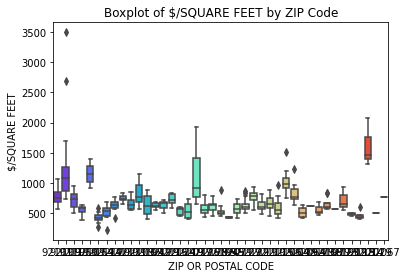

In [14]:
sns.boxplot(x='ZIP OR POSTAL CODE', y='$/SQUARE FEET', data=df_mod, palette='rainbow').set_title("Boxplot of $/SQUARE FEET by ZIP Code")

Scatterplot of the grouped dataframe by Neighborhood/Zipcode

Text(0.5, 1.0, 'Scatterplot of $/SQUARE FEET by ZIP Code')

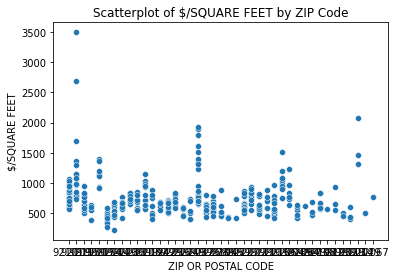

In [15]:
# Scatter Plot of "Zip or Postal Code" vs "$/Square Feet" to show the distribution of the data
sns.scatterplot(x='ZIP OR POSTAL CODE', y='$/SQUARE FEET', data=df_mod).set_title("Scatterplot of $/SQUARE FEET by ZIP Code")

## 2.6) Convert Categorical Data to Numerical Data

Using One Hot Encoding to convert categorical data to numerical data

In [16]:
# Adjust Dataframe for Linear Regression Analysis
df_model = pd.get_dummies(df_mod, columns=['ZIP OR POSTAL CODE']) # Convert categorical data to dummy variables
df_model = pd.get_dummies(df_model, columns=['LOCATION']) # Convert categorical data to dummy variables
df_model = pd.get_dummies(df_model, columns=['PROPERTY TYPE']) # Convert categorical data to dummy variables

## 2.7) Setting the Independent and Dependent Variables

Set the independent variables (X) and dependent variable (y)

In [17]:
X=df_model.drop("$/SQUARE FEET", axis=1) # Drop the target variable from the dataframe
y=df_model["$/SQUARE FEET"] # Set the target variable as the y variable

Display the Independent and Dependent Variables

In [18]:
# Display the independent variables for the model (X)
print("Number of Independent Variables: ", len(df_model.columns))
print("Independent Variables: ", df_model.columns.values)

Number of Independent Variables:  135
Independent Variables:  ['PRICE' 'BEDS' 'BATHS' 'SQUARE FEET' 'LOT SIZE' 'YEAR BUILT'
 'DAYS ON MARKET' '$/SQUARE FEET' 'HOA/MONTH' 'ZIP OR POSTAL CODE_91902'
 'ZIP OR POSTAL CODE_91942' 'ZIP OR POSTAL CODE_91945'
 'ZIP OR POSTAL CODE_91950' 'ZIP OR POSTAL CODE_91977'
 'ZIP OR POSTAL CODE_92014' 'ZIP OR POSTAL CODE_92029'
 'ZIP OR POSTAL CODE_92037' 'ZIP OR POSTAL CODE_92064'
 'ZIP OR POSTAL CODE_92067' 'ZIP OR POSTAL CODE_92071'
 'ZIP OR POSTAL CODE_92101' 'ZIP OR POSTAL CODE_92102'
 'ZIP OR POSTAL CODE_92103' 'ZIP OR POSTAL CODE_92104'
 'ZIP OR POSTAL CODE_92105' 'ZIP OR POSTAL CODE_92106'
 'ZIP OR POSTAL CODE_92107' 'ZIP OR POSTAL CODE_92108'
 'ZIP OR POSTAL CODE_92109' 'ZIP OR POSTAL CODE_92110'
 'ZIP OR POSTAL CODE_92111' 'ZIP OR POSTAL CODE_92113'
 'ZIP OR POSTAL CODE_92114' 'ZIP OR POSTAL CODE_92115'
 'ZIP OR POSTAL CODE_92116' 'ZIP OR POSTAL CODE_92117'
 'ZIP OR POSTAL CODE_92119' 'ZIP OR POSTAL CODE_92120'
 'ZIP OR POSTAL CODE_92122' 'ZIP 

In [19]:
# Display the dependent variable for the model (y)
print("Dependent Variable: ", df_model['$/SQUARE FEET'].name)

Dependent Variable:  $/SQUARE FEET


Display the shape of the Independent and Dependent Variables

In [20]:
# Display the shape of the independent variables (X)
print("Shape of X: ", X.shape)

# Display the shape of the dependent variable (y)
print("Shape of y: ", y.shape)

Shape of X:  (347, 134)
Shape of y:  (347,)


## 2.8 Dataframe Visualization (Correlation)

Probability Density Function (PDF) of the Independent Variables

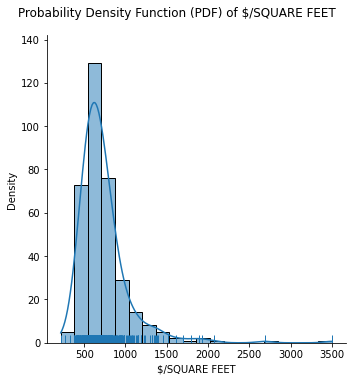

In [21]:
# Probability Density Function (PDF) of to show the distribution of the data
sns.displot(y, kde=True, rug=True, bins=20).set(xlabel='$/SQUARE FEET', ylabel='Density').fig.suptitle('Probability Density Function (PDF) of $/SQUARE FEET').set_position([.5, 1.05])
plt.show()

Q-Q Plot of the Independent Variables. The goodness of fit is determined by the closeness of the points to the line and currently displays a normal fit.

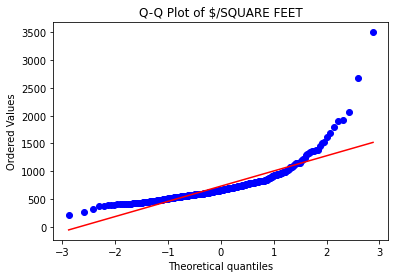

In [22]:
import scipy.stats as stats
# Q-Q plot to show the distribution of the data
stats.probplot(y, dist="norm", plot=plt)
plt.title("Q-Q Plot of $/SQUARE FEET")
plt.show()

Correlation Matrix of the Independent Variables and Dependent Variable

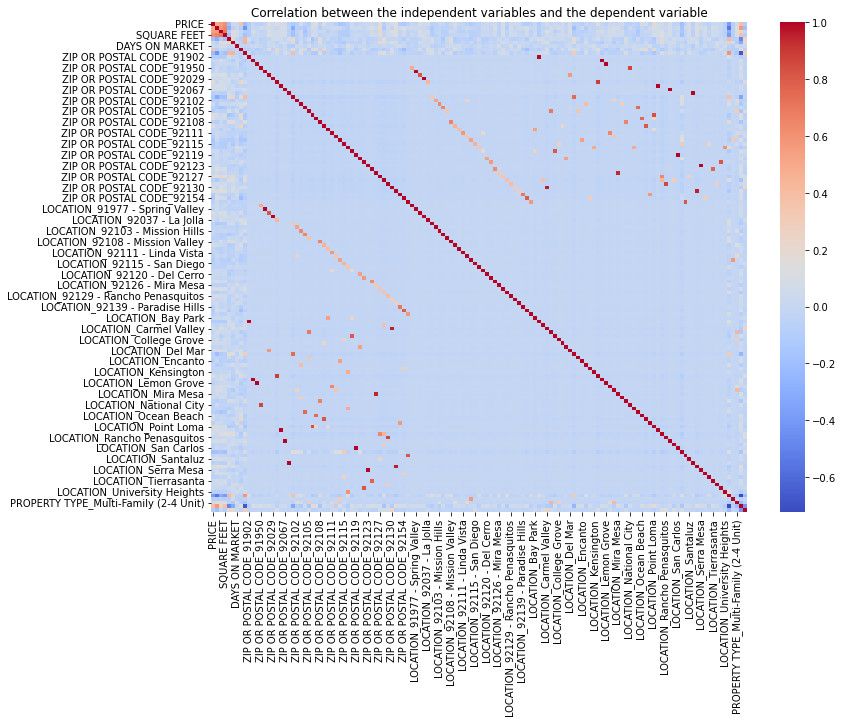

In [23]:
# Correlation between the independent variables and the dependent variable
corrmat = df_model.corr()
corrmat = df_model.corr(method='kendall') # Kendall Correlation
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation between the independent variables and the dependent variable")
plt.show()

Snapshot of the dataframe after preparation

In [24]:
# Display the new dataframe with dummy variables
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 349
Columns: 135 entries, PRICE to PROPERTY TYPE_Townhouse
dtypes: float64(7), int64(2), uint8(126)
memory usage: 77.9 KB


# 3) Regression Model

## 3.1) Importing Libraries

Importing the necessary libraries to split the dataframe

In [25]:
# Import Sklearn Libraries
from sklearn.model_selection import train_test_split

## 3.2) Splitting the Dataframe

Splitting the dataframe into training and testing sets (70/30)

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3.3) Dataframe Modeling

Importing the necessary libraries to model the dataframe and Setting the model

In [27]:
# Set the Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 3.4) Fitting the Model

Fit the model to the training set

In [28]:
# Fit the model to the training data
lm.fit(X_train, y_train)

# Predict the values of the testing data
y_pred = lm.predict(X_test)

# 4) Model Evaluation

In [29]:
# Import Libraries for Analysis of MAE and MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 4.1) Model Score 

Scoring the model on the training set (R^2)

In [30]:
# Score the model on the testing data
model_score = lm.score(X_test, y_test).round(4)
print("Model Score (R Squared): ", model_score)

Model Score (R Squared):  0.8429


Model Score using OLS

In [31]:
# STATSMODELS Linear Regression Model to show the p-values of each feature
from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
lin_model_results = OLS(y, X).fit()
lin_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          $/SQUARE FEET   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     18.32
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.26e-73
Time:                        00:09:17   Log-Likelihood:                -2104.6
No. Observations:                 347   AIC:                             4429.
Df Residuals:                     237   BIC:                             4853.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     476.7809    751.378      0.635      0.526   -1003.453    1957.015
PRICE                                       0.0005   1.96e-05     23.358      0.000       0.000       0.000
BEDS                                      -11.8850     11.225     -1.059      0.291     -33.998      10.228
BATHS                                      20.0026     19.061      1.049      0.295     -17.548      57.553
SQUARE FEET                                -0.3757      0.025    -15.153      0.000      -0.425      -0.327
LOT SIZE                                -8.068e-06      0.000     -0.060      0.952      -0.000       0.000
YEAR BUILT                                  0.0436      0.474      0.092      0.927      -0.890       0.977
DAYS ON MARKET                              0.7860      0.555      1.415      0.158      -0.308       1.880
HOA/MONTH                                   0.0133      0.041      0.326      0.744      -0.067       0.094
ZIP OR POSTAL CODE_91902                  -36.1164     47.881     -0.754      0.451    -130.443      58.210
ZIP OR POSTAL CODE_91942                  -14.7668     31.933     -0.462      0.644     -77.675      48.141
ZIP OR POSTAL CODE_91945                  -47.3339     48.359     -0.979      0.329    -142.602      47.935
ZIP OR POSTAL CODE_91950                   -9.0272     52.601     -0.172      0.864    -112.653      94.599
ZIP OR POSTAL CODE_91977                  -22.8366     63.964     -0.357      0.721    -148.847     103.174
ZIP OR POSTAL CODE_92014                 -253.3653     68.939     -3.675      0.000    -389.177    -117.554
ZIP OR POSTAL CODE_92029                   95.8173     66.061      1.450      0.148     -34.324     225.958
ZIP OR POSTAL CODE_92037                   65.4399     33.281      1.966      0.050      -0.125     131.005
ZIP OR POSTAL CODE_92064                   97.0947     66.211      1.466      0.144     -33.343     227.532
ZIP OR POSTAL CODE_92067                   31.8392     69.766      0.456      0.649    -105.602     169.280
ZIP OR POSTAL CODE_92071                  -16.1223     47.724     -0.338      0.736    -110.139      77.894
ZIP OR POSTAL CODE_92101                  115.6961     61.275      1.888      0.060      -5.017     236.409
ZIP OR POSTAL CODE_92102                  -36.6765     74.264     -0.494      0.622    -182.979     109.626
ZIP OR POSTAL CODE_92103                   77.3925     78.991      0.980      0.328     -78.222     233.007
ZIP OR POSTAL CODE_92104                   71.9770     36.604      1.966      0.050      -0.134     144.088
ZIP OR POSTAL CODE_92105                  -47.1283     94.505     -0.499      0.618    -233.305     139.048
ZIP OR POSTAL CODE_92106                   51.5362    166.7

## 4.2) Visualization (Actual vs Predicted)

Setting the scatterplot of the actual vs predicted values

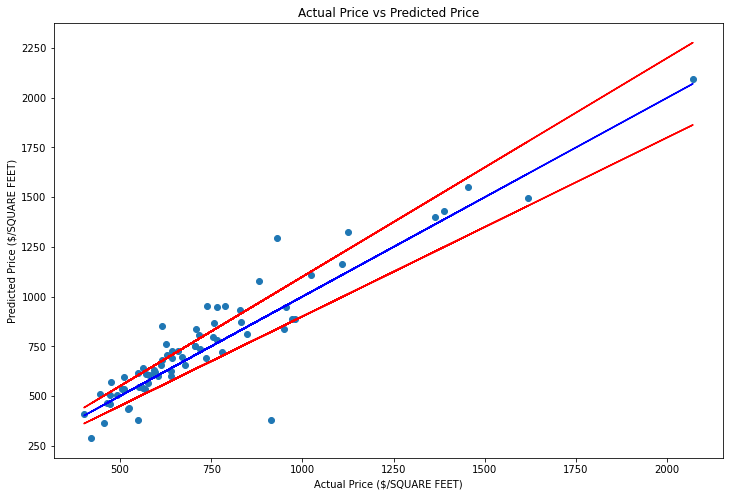

In [32]:
# Plot the predicted values vs the actual values
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price ($/SQUARE FEET)')
plt.ylabel('Predicted Price ($/SQUARE FEET)')
plt.title('Actual Price vs Predicted Price')
# plot the perfect prediction line
plt.plot(y_test, y_test, color='blue')
# plot the 10% error line
plt.plot(y_test, y_test*1.1, color='red')
# plot the -10% error line
plt.plot(y_test, y_test*0.9, color='red')

plt.show()


## 4.3) Mean Absolute Error (MAE) and Mean Squared Error (MSE)

In [33]:
# Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_pred, y_test)
lin_msre = np.sqrt(lin_mse)
print("Linear Regression RMSE: %.4f" % lin_msre)
print("Linear Regression MAE: %.4f" % lin_mae)
print("Linear Regression MSE: %.4f" % lin_mse)

Linear Regression RMSE: 116.3129
Linear Regression MAE: 79.3861
Linear Regression MSE: 13528.6863


# 5) Model Prediction Test (User Input)

Selecting a random row from the testing set and predicting the price

In [34]:
# Test the model with a house from the dataset
# Choose between 0 and 289 (289 is the last row in the dataset of 290 rows)
house_Index = 123 # <----- Change this value to test a different house 
house = df_model.iloc[house_Index] 

# Predict the price of the house
predict = (lm.predict([house.drop('$/SQUARE FEET')])).round(2) # Predict the price of the house
print("Predicted Price", predict[0], "($/SQUARE FEET)") # Display the predicted price of the house
print("Actual Price:", house["$/SQUARE FEET"], "($/SQUARE FEET)") # Display the price of the house

# Display the difference between the predicted and actual price of the house
difference = (predict[0] - house["$/SQUARE FEET"]).round(2)
print("Difference:", difference, "($/SQUARE FEET)") 

# Display the percent difference between the predicted and actual price of the house
percent = ((difference / house["$/SQUARE FEET"]) * 100).round(2)
print("Percent Difference:", percent, "(%)") 

# Display the percent error between the predicted and actual price of the house
error = ((predict[0] - house["$/SQUARE FEET"])/predict[0]*100).round(2)
print("Percent Error:", error, "(%)") 

# Additional Information about the house
house

Predicted Price 836.31 ($/SQUARE FEET)
Actual Price: 708.0 ($/SQUARE FEET)
Difference: 128.31 ($/SQUARE FEET)
Percent Difference: 18.12 (%)
Percent Error: 15.34 (%)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PRICE                                      899000.0
BEDS                                            3.0
BATHS                                           2.5
SQUARE FEET                                  1269.0
LOT SIZE                                    13025.0
                                             ...   
PROPERTY TYPE_Condo/Co-op                       0.0
PROPERTY TYPE_Mobile/Manufactured Home          0.0
PROPERTY TYPE_Multi-Family (2-4 Unit)           0.0
PROPERTY TYPE_Single Family Residential         1.0
PROPERTY TYPE_Townhouse                         0.0
Name: 123, Length: 135, dtype: float64

Test the model with a house from a new dataset

# 6) Conclusion

Hypothesis Testing

<ol>
<li>H0: for Xi=92122 y>=828, H1: y< 828</li>
<li>H0: for Xi=92067 y>=840, H1: y< 840</li>
<li>H0: for Xi=92037 y>=889, H1: y< 889</li>
<li>H0: for Xi=91942 y>=485, H1: y< 485</li>
<li>H0: for Xi=92127 y>=579, H1: y< 579</li>
</ol>